In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import os

In [2]:
sensor_coords = {
    "R1": (1, 4), "R2": (2, 4), "R3": (3, 4),
    "R4": (4, 3), "R5": (4, 2), "R6": (4, 1),
    "R7": (1, 0), "R8": (2, 0), "R9": (3, 0),
    "R10": (0, 1), "R11": (0, 2), "R12": (0, 3)
}

In [3]:
force_coords={"P1":(3,1),"P2":(2,1),"P3":(1,1),"P4":(1,2),"P5":(2,2),"P6":(3,2),"P7":(3,3),"P8":(2,3),"P9":(1,1)}

In [78]:
#dict(zip([x*6/100 for x in range(5,51,5)],[str(x*6/100) for x in range(5,51,5)]))
[x*6/100 for x in range(5,50,5)]

[0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7]

In [80]:
def get_force(folder,listfolder,concent,depth,ch,mat_depth):
    if concent=='7 phr':
        f='{} {}_.csv'.format(concent,depth)
    else:
        f='{}_.csv'.format(depth)
    getfile='{}/{}/{}'.format(folder,listfolder,f)
    loadfile=pd.read_csv(getfile)
    eq_depth=mat_depth*depth/100
    map_values={0.25:'0.25',0.5:'0.5',0.75:'0.75',1.0:'1',1.25:'1.25',1.5:'1.5',1.75:'1.75',2.0:'2',2.25:'2.25',2.5:'2.5',3.0:'3'}
    map_values.update(dict(zip([x*6/100 for x in range(5,50,5)],[str(x*6/100) for x in range(5,50,5)])))
    av_force=loadfile.iloc[2:,3*ch-2][loadfile.iloc[2:,3*ch-3]==map_values[eq_depth]].astype(float).mean()
    return av_force

In [6]:
force_folder='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/Force_loop1_R1-12'
Rs_folder='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/9 phr 6mm loop1'

In [85]:
'{} {}mm {}_R1-12_p{}_{}_'.format(concent,mat_depth,withloop,ch,10)

'9 phr 6mm loop1_R1-12_p1_10_'

In [89]:
#withloop=Rs_folder.split('/')[-1].split()[-1]
#os.listdir(Rs_folder)

In [81]:
ch=1
depth=2
concent=Rs_folder.split('/')[3].split('_')[0]
mat_depth=int(Rs_folder.split('/')[3].split('_')[1][0])
withloop=Rs_folder.split('/')[-1].split()[-1]
map_values={0.25:'0.25',0.5:'0.5',0.75:'0.75',1.0:'1',1.25:'1.25',1.5:'1.5',1.75:'1.75',2.0:'2',2.25:'2.25',2.5:'2.5',3.0:'3'}
map_values.update(dict(zip([x*6/100 for x in range(5,50,5)],[str(x*6/100) for x in range(5,50,5)])))
eq_depth=mat_depth*(5*(depth-1)+5)/100
print('ep_depth = ',eq_depth)
print('{}/{}_R1-12_{}_P{}.csv'.format(force_folder,concent,withloop,ch))
loadforces=pd.read_csv('{}/{}_R1-12_{}_P{}.csv'.format(force_folder,concent,withloop,ch))
loadR=pd.read_csv('{}/{} {}mm {}_R1-12_p{}_{}_/dat00001.csv'.format(Rs_folder,concent,mat_depth,withloop,ch,5*depth))
#av_force=loadforces.iloc[2:,3*(ch-1)+2][loadforces.iloc[2:,3*(ch-1)+3]==map_values[eq_depth]].astype(float).mean()
av_force=loadforces.loc[3:]['Unnamed: {}'.format(3*depth-2)][loadforces.loc[3:]['Unnamed: {}'.format(3*depth-1)]==map_values[eq_depth]].astype(float).mean()
print(av_force)
print('{}/{} {}mm {}_R1-12_p{}_{}_/dat00001.csv'.format(Rs_folder,concent,mat_depth,withloop,ch,5*depth))
len(loadR[loadR.columns[2:]].astype(float).mean().values)

ep_depth =  0.6
raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/Force_loop1_R1-12/9 phr_R1-12_loop1_P1.csv
0.9328787831168831
raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/9 phr 6mm loop1/9 phr 6mm loop1_R1-12_p1_10_/dat00001.csv


12

In [85]:
def get_df_FR(force_folder,Rs_folder):
    map_values={0.25:'0.25',0.5:'0.5',0.75:'0.75',1.0:'1',1.25:'1.25',1.5:'1.5',1.75:'1.75',2.0:'2',2.25:'2.25',2.5:'2.5',3.0:'3'}
    map_values.update(dict(zip([x*6/100 for x in range(5,50,5)],[str(x*6/100) for x in range(5,50,5)])))
    R1=[]
    R2=[]
    R3=[]
    R4=[]
    R5=[]
    R6=[]
    R7=[]
    R8=[]
    R9=[]
    R10=[]
    R11=[]
    R12=[]
    F=[]
    pos=[]
    withdepth=[]
    concent=Rs_folder.split('/')[3].split('_')[0]
    mat_depth=int(Rs_folder.split('/')[3].split('_')[1][0])
    withloop=Rs_folder.split('/')[-1].split()[-1]
    for ch in range(1,10):
        for depth in range(1,11):
            eq_depth=mat_depth*(5*(depth-1)+5)/100
            #print('ep_depth = ',eq_depth)
            #print('{}/{}_R1-12_{}_P{}.csv'.format(force_folder,concent,withloop,ch))
            loadforces=pd.read_csv('{}/{}_R1-12_{}_P{}.csv'.format(force_folder,concent,withloop,ch))
            loadR=pd.read_csv('{}/{} {}mm {}_R1-12_p{}_{}_/dat00001.csv'.format(Rs_folder,concent,mat_depth,withloop,ch,5*depth))
            av_force=loadforces.loc[3:]['Unnamed: {}'.format(3*depth-2)][loadforces.loc[3:]['Unnamed: {}'.format(3*depth-1)]==map_values[eq_depth]].astype(float).dropna().mean()
            
            #print(loadforces.loc[3:]['Unnamed: {}'.format(3*depth-2)][loadforces.loc[3:]['Unnamed: {}'.format(3*depth-1)]==map_values[eq_depth]].astype(float).dropna())
            #print(loadforces.loc[3:]['Unnamed: {}'.format(3*depth-2)][loadforces.loc[3:]['Unnamed: {}'.format(3*depth-1)]==map_values[eq_depth]])
            #print('depth: ',depth,'pos: ',ch,' force: ',av_force,': ',3*depth-2)
            #print('{}/{} {}mm {}_R1-12_p{}_{}_/dat00001.csv'.format(Rs_folder,concent,mat_depth,withloop,ch,5*depth))
            getR=loadR[loadR.columns[2:]].astype(float).mean().values
            
            pos.append(ch)
            withdepth.append(5*depth)
            F.append(av_force)
            R1.append(getR[0])
            R2.append(getR[1])
            R3.append(getR[2])
            R4.append(getR[3])
            R5.append(getR[4])
            R6.append(getR[5])
            R7.append(getR[6])
            R8.append(getR[7])
            R9.append(getR[8])
            R10.append(getR[9])
            R11.append(getR[10])
            R12.append(getR[11])
    df=pd.DataFrame({'depth':withdepth,'pos':pos,'Force':F,'R1':R1,'R2':R2,'R3':R3,'R4':R4,'R5':R5,'R6':R6,'R7':R7,'R8':R8,'R9':R9,'R10':R10,'R11':R11,'R12':R12})
    return df
    #filename_force=folder.split('/')[-2].split('_')[0]+'_'+folder.split('/')[-2].split('_')[4]+'_'+folder_force.split('_')[-2]+'_P{}.csv'.format(ch)

In [101]:
folder='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position'
force_folder='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/Force_loop1_R1-12'
Rs_folder='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/9 phr 6mm loop1'
df_loop1=get_df_FR(force_folder,Rs_folder)

In [155]:
def show_r(new_input,scaler_X,scaler_y,ann_model,rf_model,xgb_model,meta_model,withshow=0):
    #new_input = np.array([[1.25, 10, 9]])  # [Force, depth, pos]
    
    
    new_input_scaled = scaler_X.transform(new_input)
    
    ann_pred_new = ann_model.predict(new_input_scaled)
    rf_pred_new = rf_model.predict(new_input_scaled)
    xgb_pred_new = xgb_model.predict(new_input_scaled)
    
    stacked_new = np.hstack([ann_pred_new, rf_pred_new, xgb_pred_new])
    
    final_pred_scaled = meta_model.predict(stacked_new)
    final_pred = scaler_y.inverse_transform(final_pred_scaled)
    if withshow==1:
        for i, val in enumerate(final_pred[0], 1):
            print(f"Predicted R{i}: {val:.2f}")
    return final_pred[0]

In [45]:
'{} {}mm {}_{}_P{}_{}_'.format(concent,mat_depth,withloop,'R1-12',1,10)

'9 phr 6mm loop1_R1-12_P1_10_'

In [13]:
def get_df(folder):
    listfolders=os.listdir(folder)
    folder_force=os.listdir('{}/{}'.format(folder,listfolders[0]))
    concent=listfolders[0][:5]
    mat_depth=int(folder.split('phr')[-1].split('_')[1][0])
    R1=[]
    R2=[]
    R3=[]
    R4=[]
    R5=[]
    R6=[]
    R7=[]
    R8=[]
    R9=[]
    R10=[]
    R11=[]
    R12=[]
    F=[]
    pos=[]
    withdepth=[]
    list_P=['P{}'.format(i) for i in range(1,10)]
    for f in listfolders:
        #print(f.split('_'))#,' depth: ',f.split('_')[1],' position: ',f.split('_')[1])
        for depth in range(5,51,5):
            for p in list_P:
                if '{}_{}__{}'.format(concent,depth,p) in f:
                    #print(f)
                    filename='{}/{}/dat00001.csv'.format(folder,f)
                    #print(filename)
                    getdat=pd.read_csv(filename)
                    res=getdat.sum()
                    R1.append(res.values[2])
                    R2.append(res.values[3])
                    R3.append(res.values[4])
                    R4.append(res.values[5])
                    R5.append(res.values[6])
                    R6.append(res.values[7])
                    R7.append(res.values[8])
                    R8.append(res.values[9])
                    R9.append(res.values[10])
                    R10.append(res.values[11])
                    R11.append(res.values[12])
                    R12.append(res.values[13])
                    F.append(get_force(folder,listfolders[0],concent,depth,int(p[1:]),mat_depth))
                    withdepth.append(depth)
                    pos.append(int(p[1:]))
    df=pd.DataFrame({'depth':withdepth,'pos':pos,'Force':F,'R1':R1,'R2':R2,'R3':R3,'R4':R4,'R5':R5,'R6':R6,'R7':R7,'R8':R8,'R9':R9,'R10':R10,'R11':R11,'R12':R12})
    return df

In [98]:
#folder='raw/drive-download/240325/9 phr_5mm_50_'#"raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/"#'raw/drive-download/240325/7 phr_5mm_50_'

In [100]:
#folder.split('phr')[-1].split('_')[1][0]

In [109]:
#folder.split('/')[-1].split('_')[:2]
folder

'raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position'

In [29]:
#folder_R1_R12='{}/{}'.format(folder,os.listdir(folder)[1])
#folder_force='{}{}'.format(folder,os.listdir(folder)[3])
#for i in range(1,10):
#    filename_force=folder.split('/')[-2].split('_')[0]+'_'+folder.split('/')[-2].split('_')[4]+'_'+folder_force.split('_')[-2]+'_P{}.csv'.format(i)
#    path_filename_force='{}/{}'.format(folder_force,filename_force)
#    load_force_P=pd.read_csv(path_filename_force)
    #print(path_filename_force)

    #os.listdir(folder_force)[0].split('.')
#filename_force

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam

In [125]:
def train_model(df):
    X = df[['Force', 'depth', 'pos']].values
    y = df[[f'R{i}' for i in range(1, 13)]].values
    
    # Normalize inputs and outputs
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y)
    
    # === 1. ANN Model ===
    def build_ann(input_dim, output_dim):
        model = Sequential([
            Input(shape=(3,)),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(output_dim)
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        return model
    
    ann_model = build_ann(X_scaled.shape[1], y_scaled.shape[1])
    ann_model.fit(X_scaled, y_scaled, epochs=300, batch_size=4, verbose=0)
    
    # === 2. Random Forest ===
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_model.fit(X_scaled, y_scaled)
    
    # === 3. XGBoost ===
    xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, objective='reg:squarederror')
    xgb_model.fit(X_scaled, y_scaled)
    
    # === Get predictions from all models ===
    ann_pred = ann_model.predict(X_scaled)
    rf_pred = rf_model.predict(X_scaled)
    xgb_pred = xgb_model.predict(X_scaled)
    
    # Stack all predictions
    stacked_features = np.hstack([ann_pred, rf_pred, xgb_pred])
    
    # === Train Meta Model ===
    meta_model = Ridge()
    meta_model.fit(stacked_features, y_scaled)
    
    # Predict final output
    final_pred_scaled = meta_model.predict(stacked_features)
    final_pred = scaler_y.inverse_transform(final_pred_scaled)
    y_true = scaler_y.inverse_transform(y_scaled)
    
    # === R² Scores ===
    r2_scores = r2_score(y_true, final_pred, multioutput='raw_values')
    print("\n📈 R² Scores (Stacked Model on All Data):")
    for i, r2 in enumerate(r2_scores, 1):
        print(f"R² Score for R{i}: {r2:.4f}")
    return final_pred,y_true,scaler_X,scaler_y,r2_scores,ann_model,rf_model,xgb_model,meta_model

In [126]:
final_pred,y_true,scaler_X,scaler_y,r2_scores,dann_model,rf_model,xgb_model,meta_model=train_model(df_loop1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

📈 R² Scores (Stacked Model on All Data):
R² Score for R1: 0.9989
R² Score for R2: 0.9993
R² Score for R3: 0.9991
R² Score for R4: 0.9989
R² Score for R5: 0.9991
R² Score for R6: 0.9990
R² Score for R7: 0.9992
R² Score for R8: 0.9987
R² Score for R9: 0.9992
R² Score for R10: 0.9986
R² Score for R11: 0.9988
R² Score for R12: 0.9992


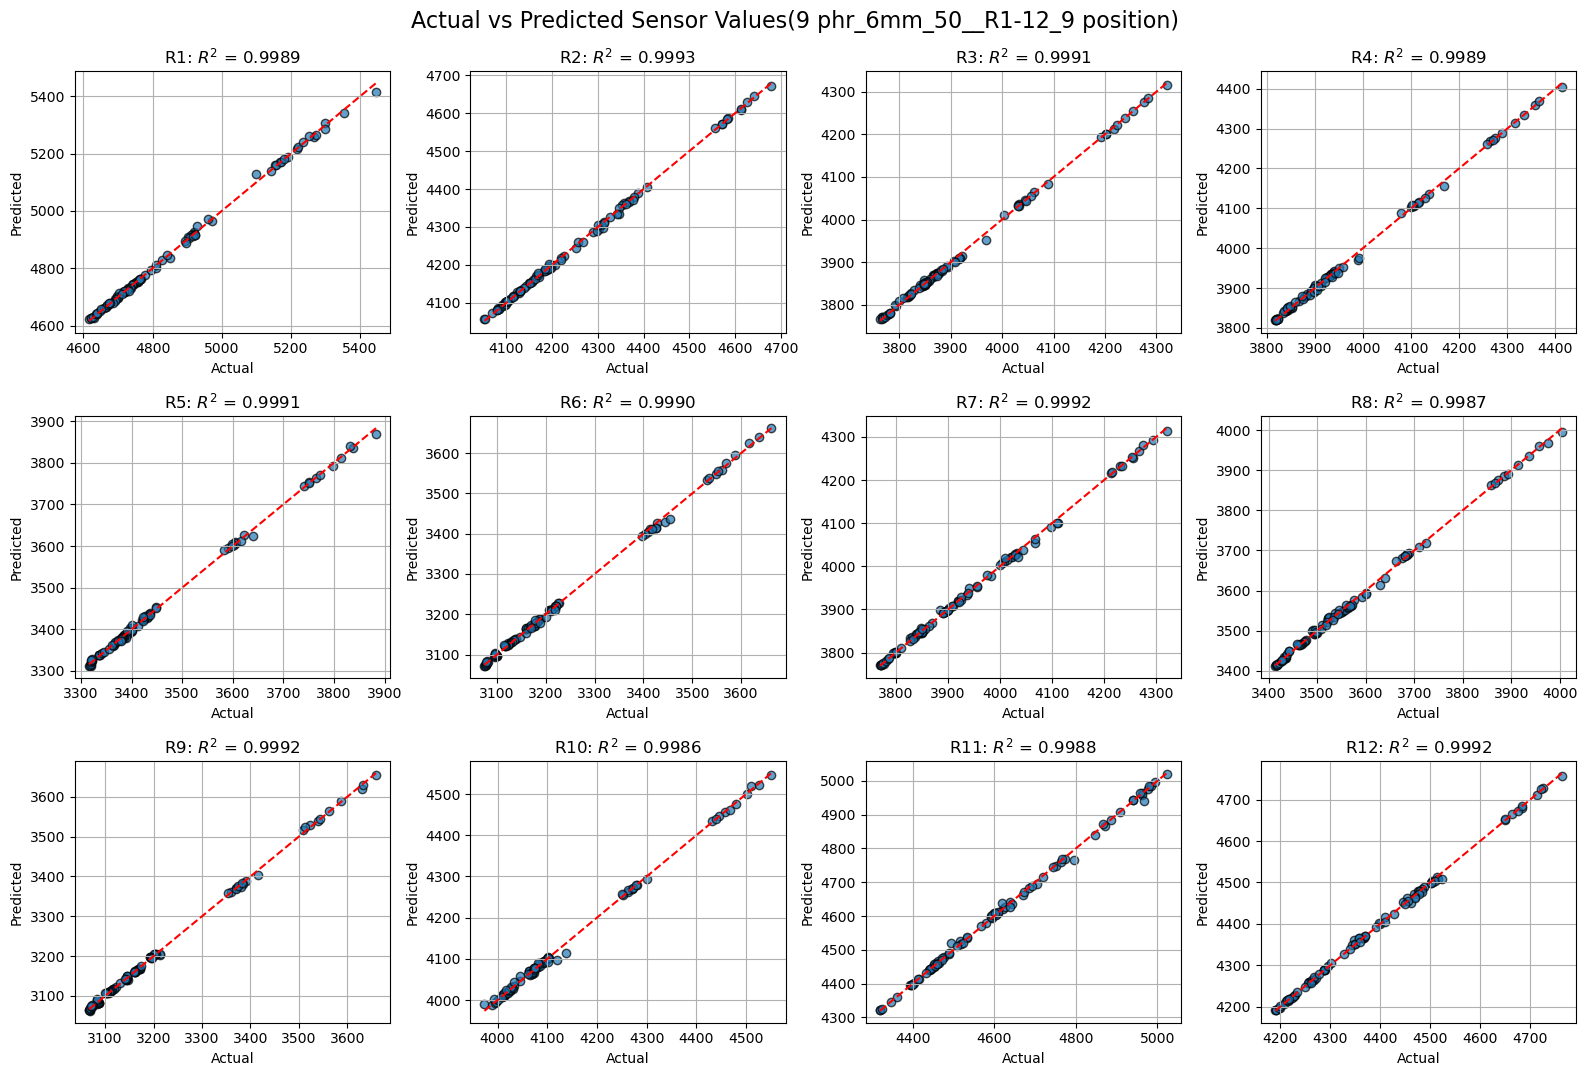

In [117]:
#comparing actual and predict results
n_cols = 4
n_rows = int(np.ceil(12 / n_cols))
plt.figure(figsize=(n_cols * 4, n_rows * 3.5))

for i in range(12):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(y_true[:, i], final_pred[:, i], alpha=0.7, edgecolors='k')
    plt.plot([y_true[:, i].min(), y_true[:, i].max()],
             [y_true[:, i].min(), y_true[:, i].max()], 'r--')
    plt.title(f'R{i+1}: $R^2$ = {r2_scores[i]:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Actual vs Predicted Sensor Values({})'.format(folder.split('/')[-1]), fontsize=16, y=1.02)
plt.show()


In [156]:
show_r(np.array([[0.449597, 10, 1]]),scaler_X,scaler_y,ann_model,rf_model,xgb_model,meta_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([5185.31932585, 4605.48708167, 4212.16347269, 4276.28803157,
       3761.37922811, 3555.91648607, 4248.47109865, 3883.84973926,
       3538.52018987, 4456.06516275, 4973.39112946, 4677.10668038])

In [128]:
folder='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position'
force_folder_loop2='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/Force_loop2_R1-12'
Rs_folder_loop2='raw/drive-download/230425/9 phr_6mm_50__R1-12_9 position/9 phr 6mm loop2'
df_loop2=get_df_FR(force_folder,Rs_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


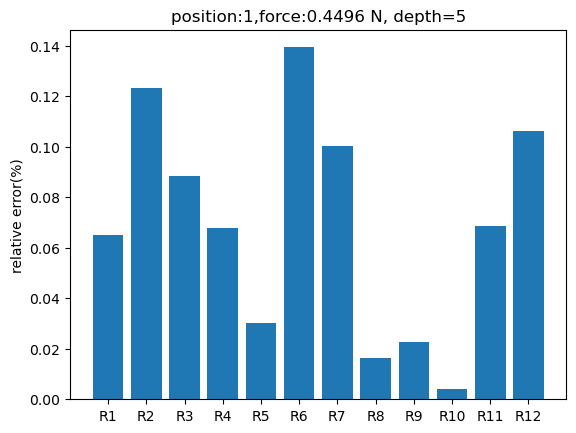

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


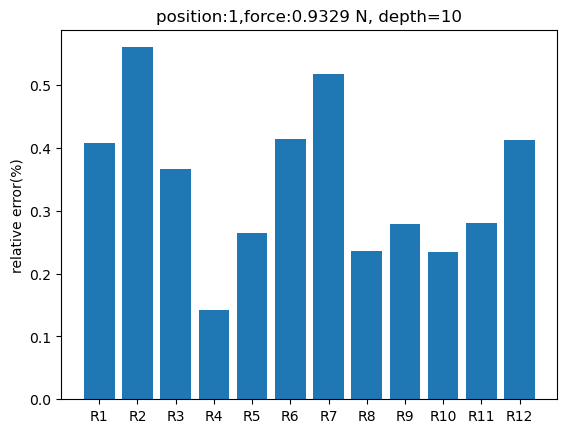

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


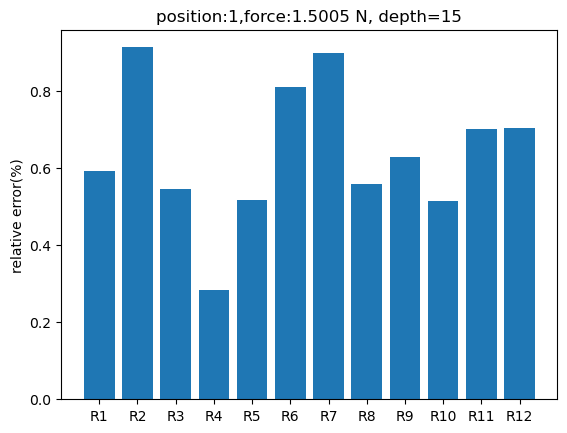

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


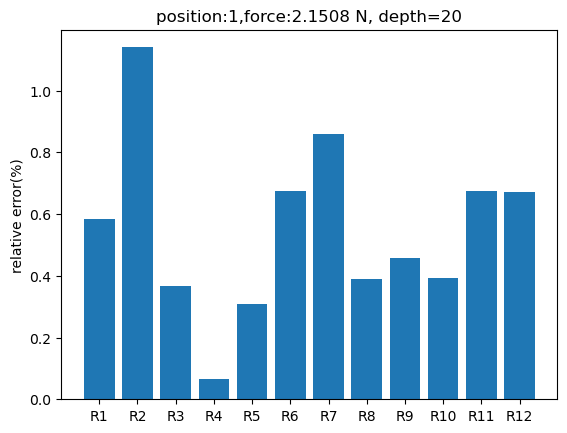

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


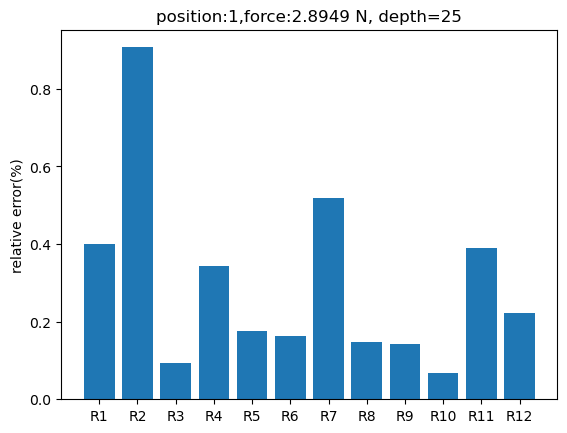

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


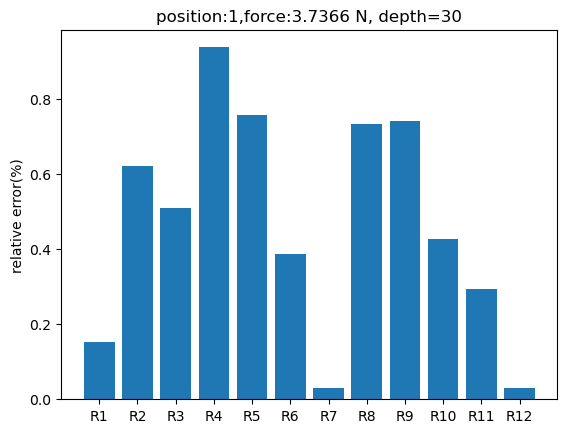

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


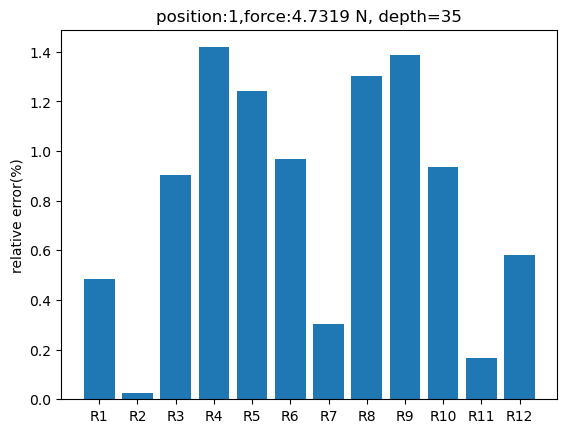

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


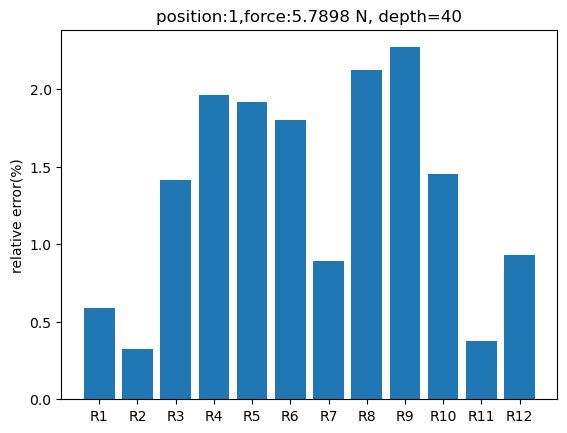

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


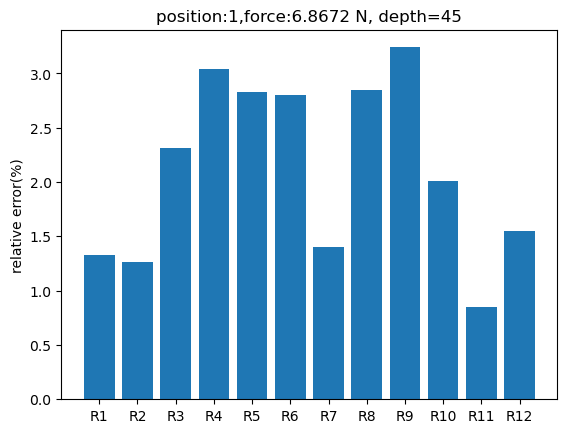

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


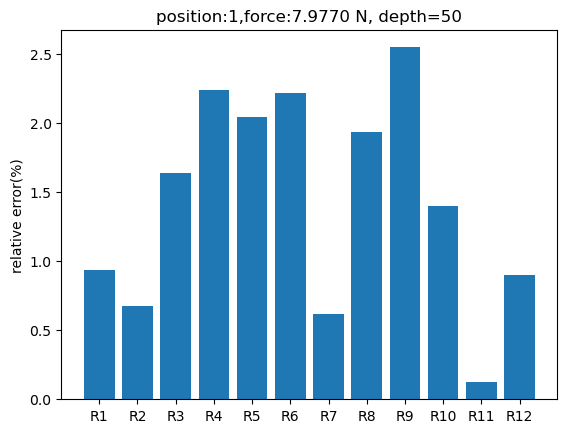

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


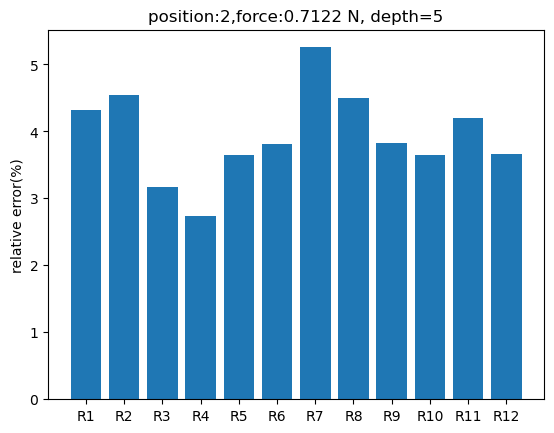

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


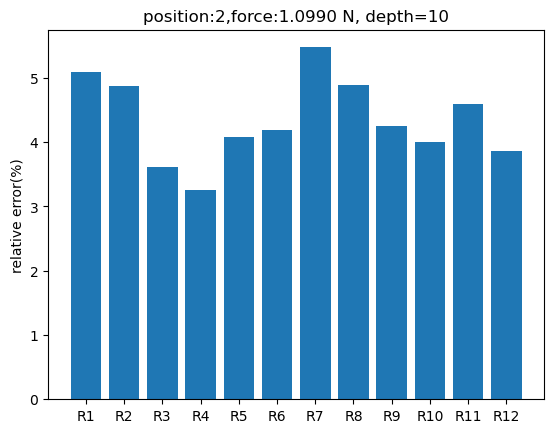

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


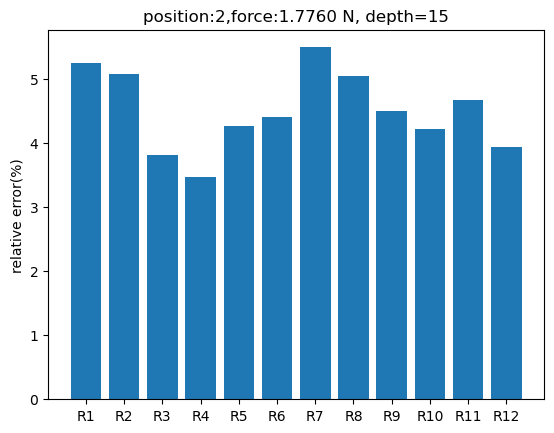

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


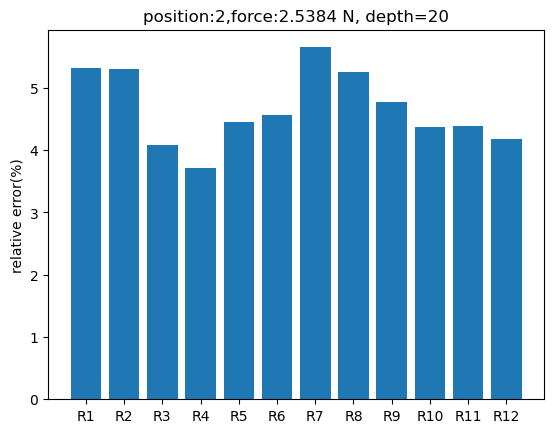

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


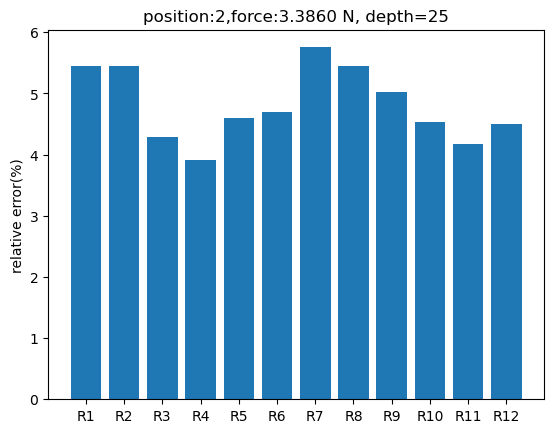

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


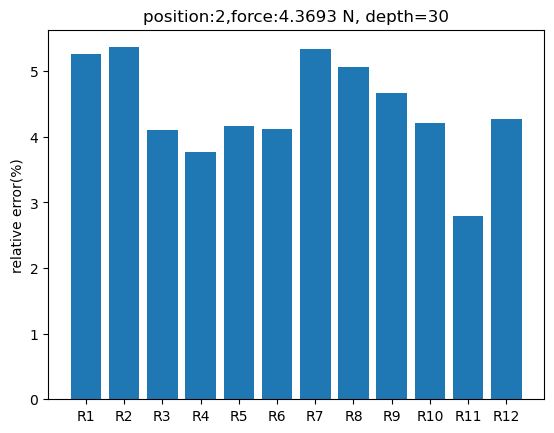

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


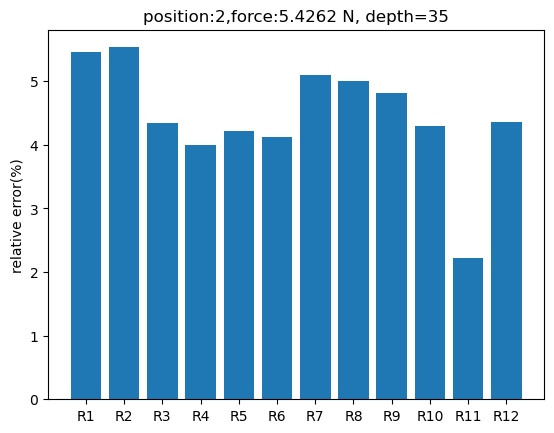

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


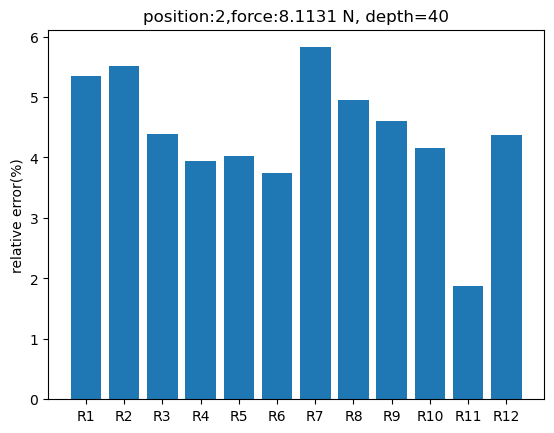

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


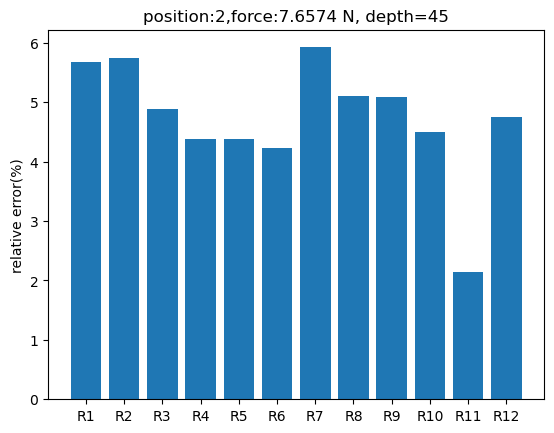

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


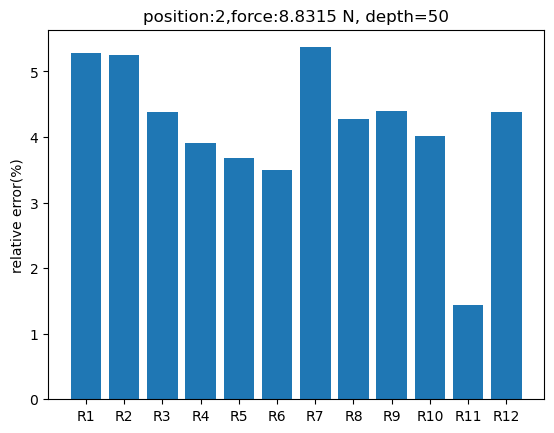

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


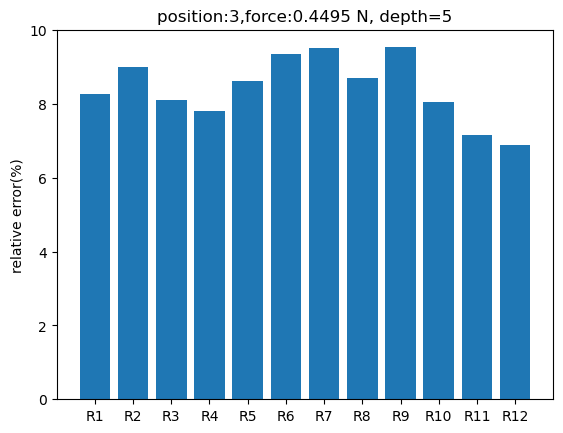

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


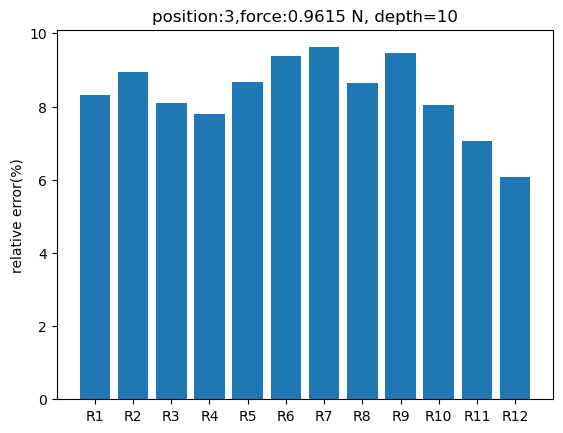

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


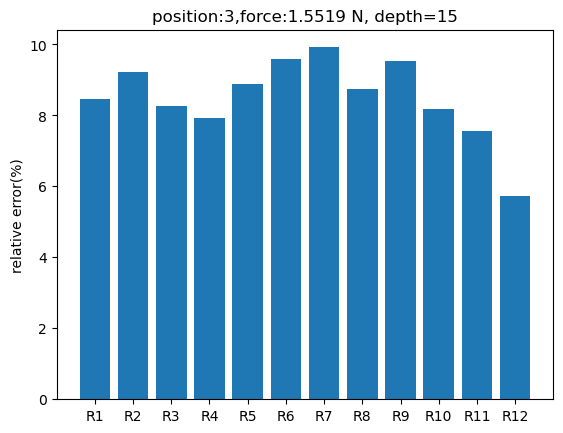

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


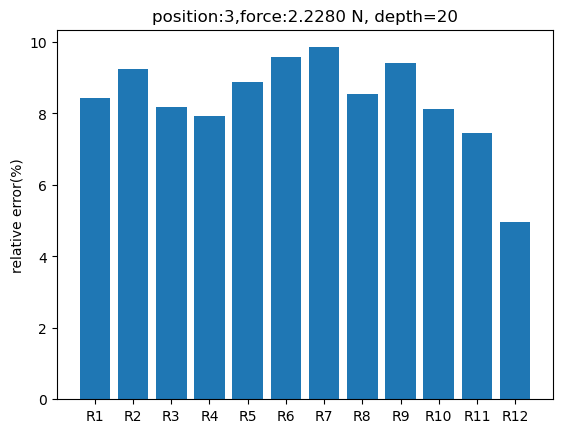

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


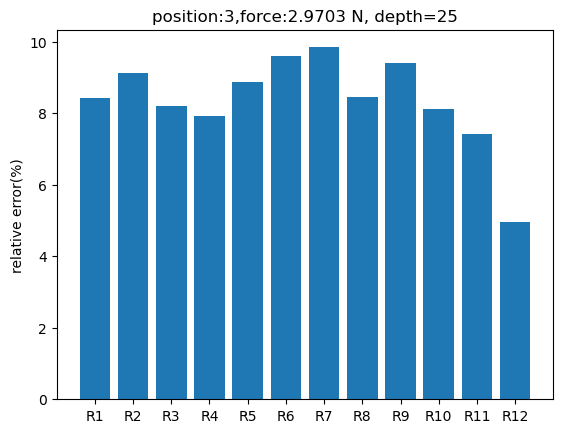

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


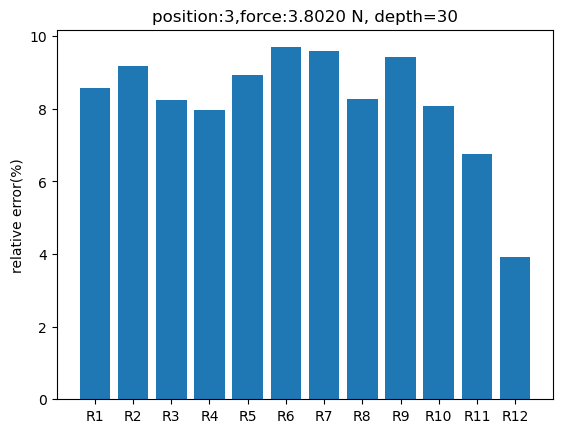

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


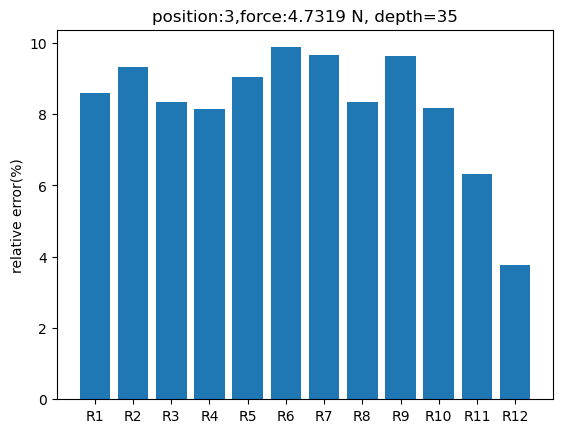

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


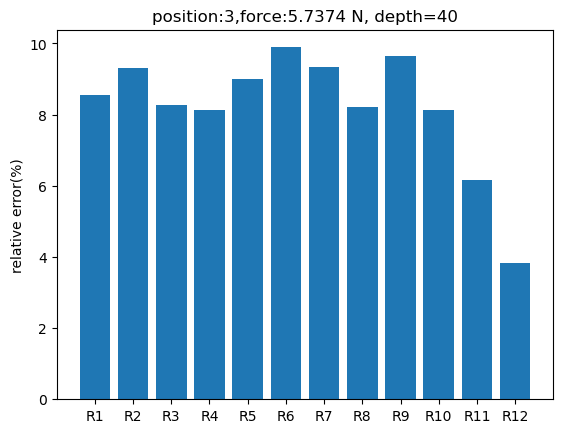

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


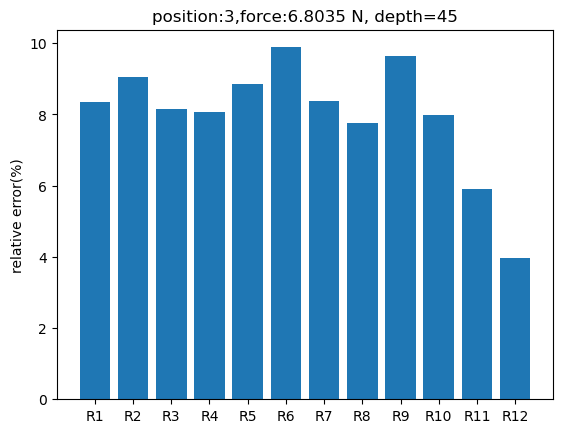

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


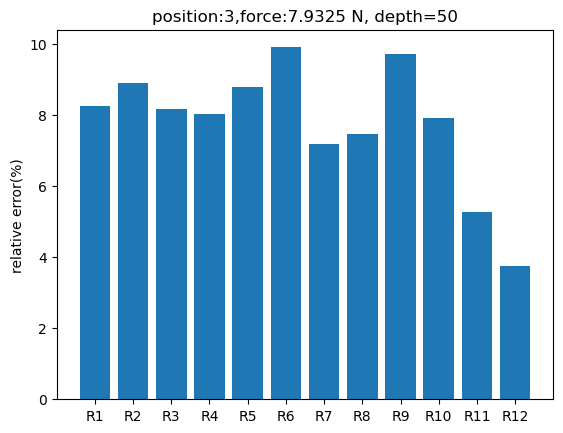

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


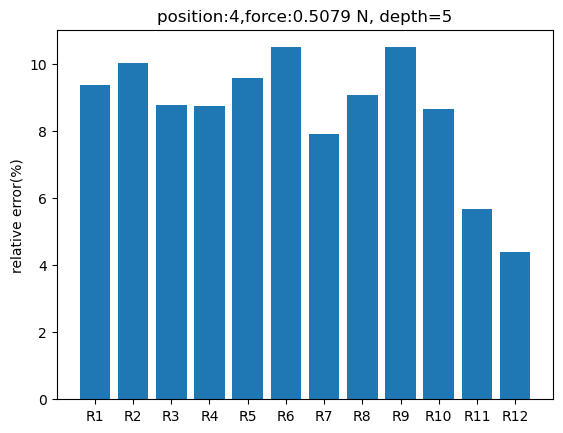

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


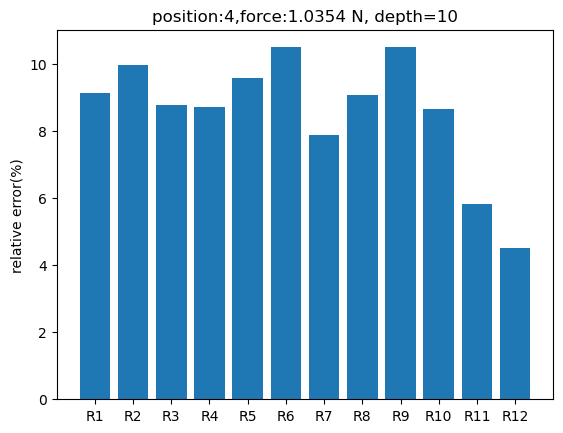

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


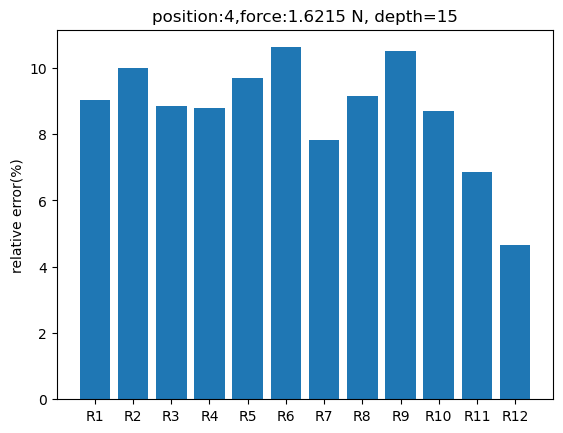

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


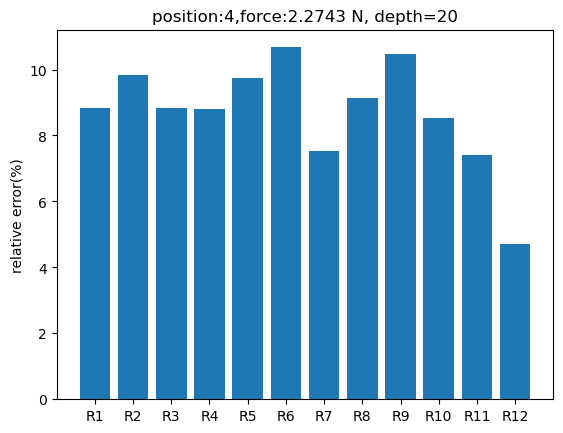

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


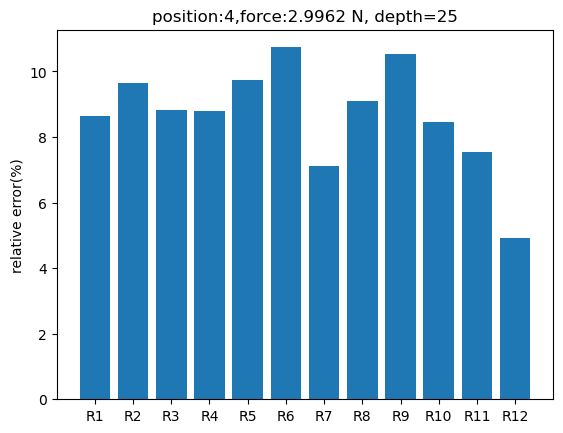

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


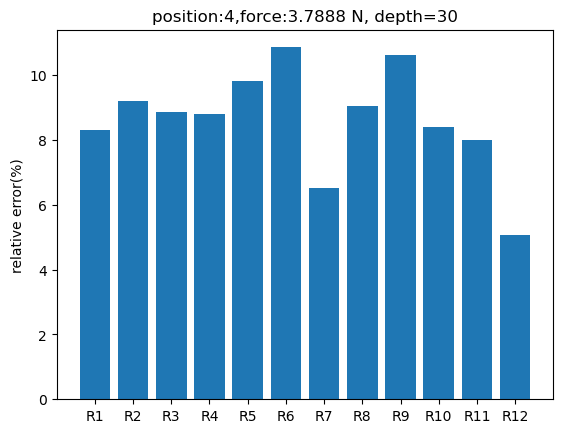

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


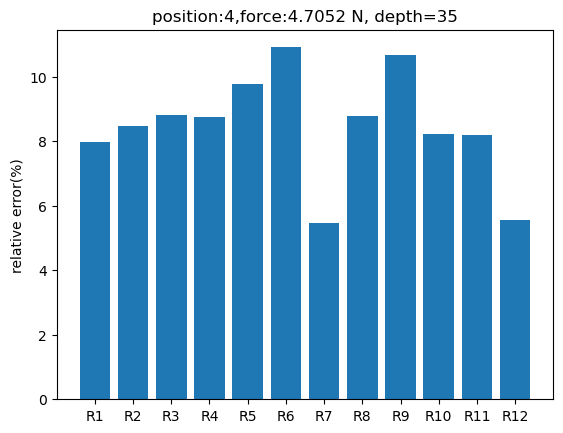

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


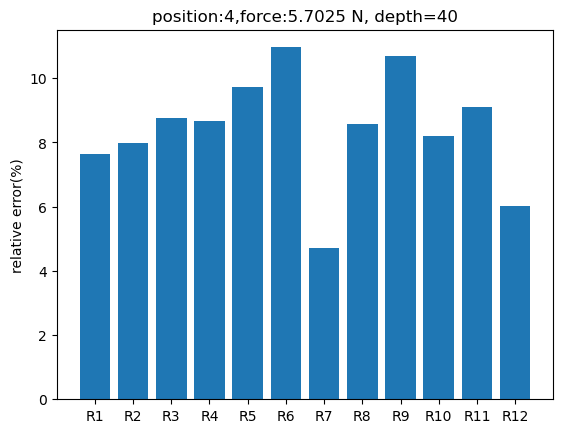

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


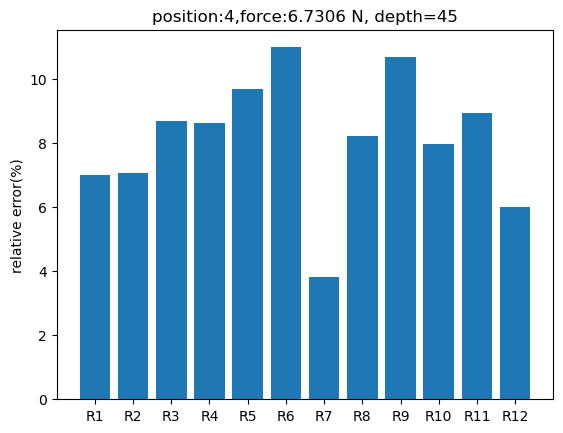

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


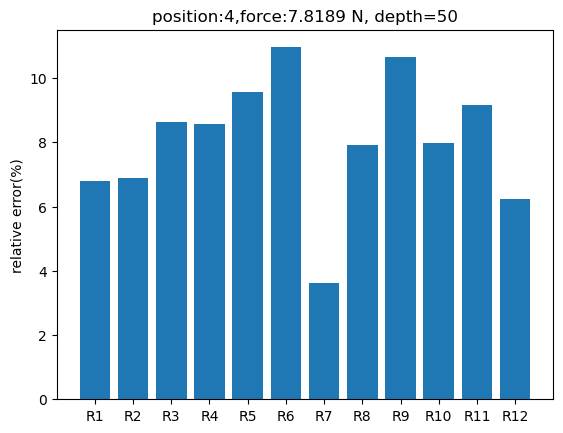

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


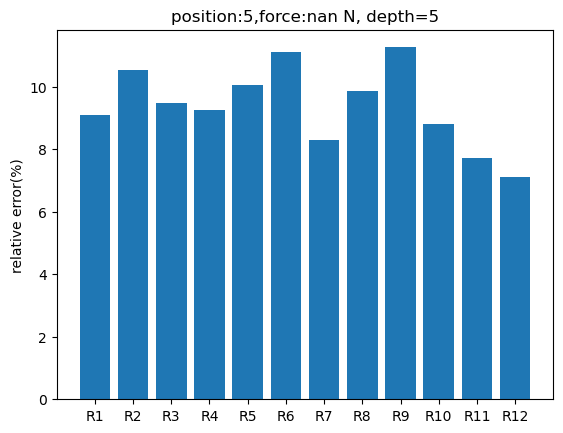

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


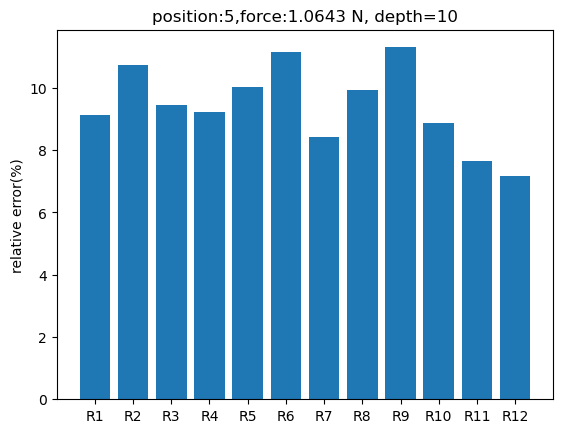

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


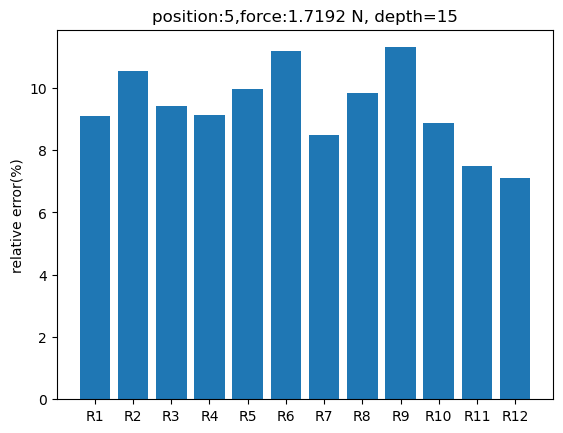

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


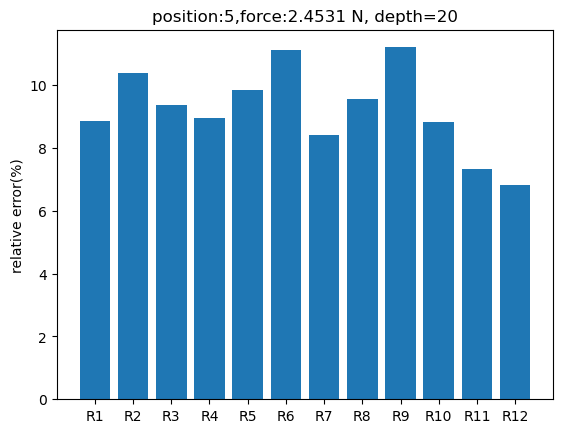

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


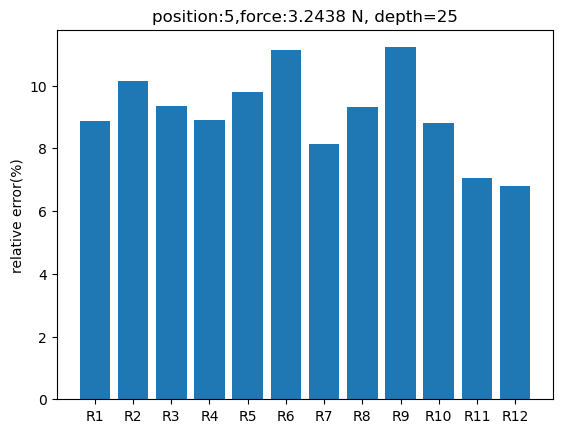

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


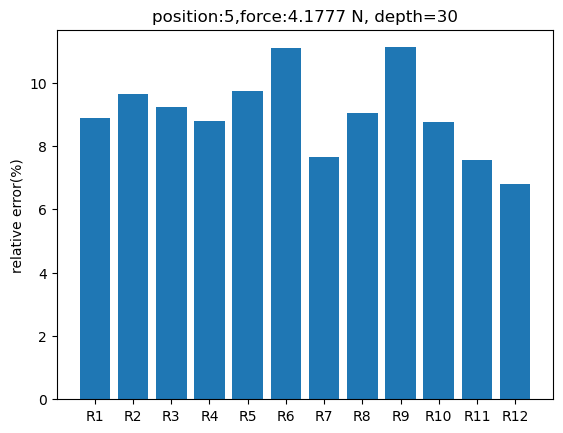

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


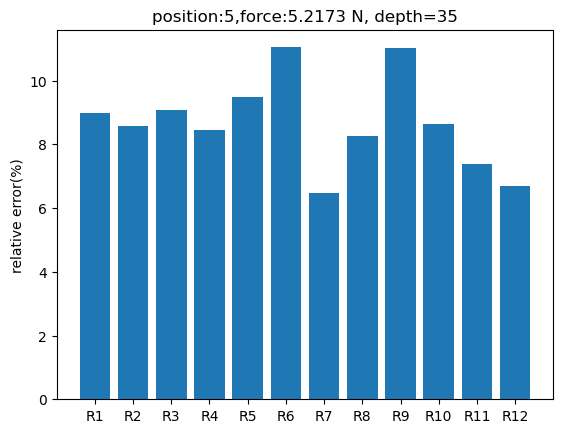

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


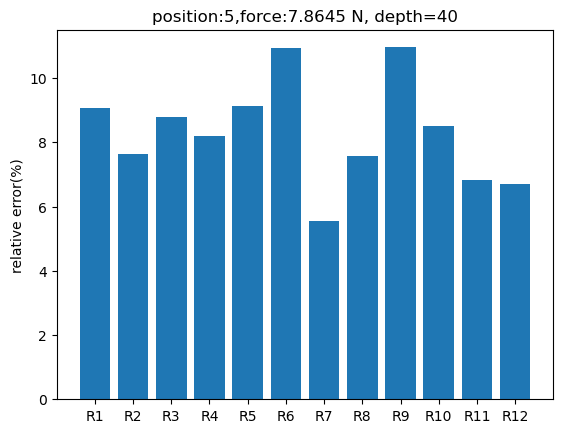

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


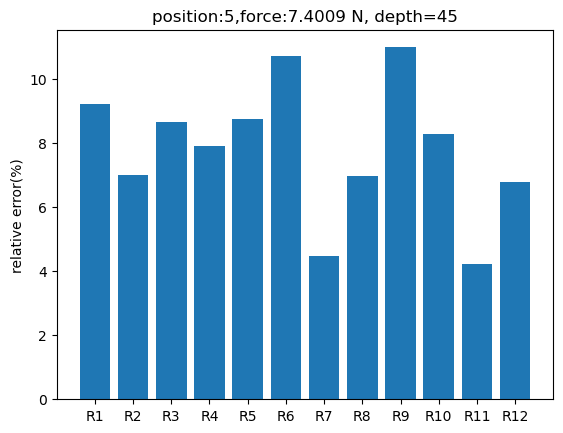

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


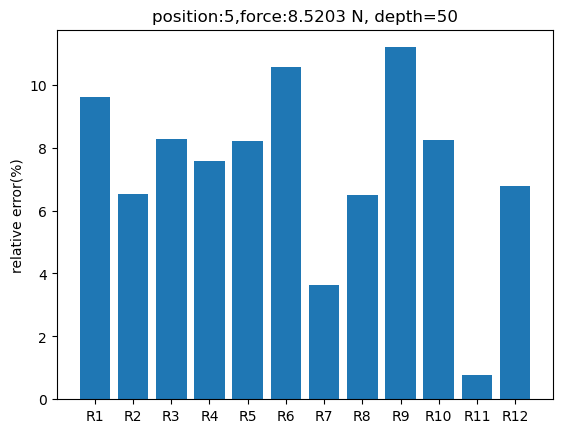

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


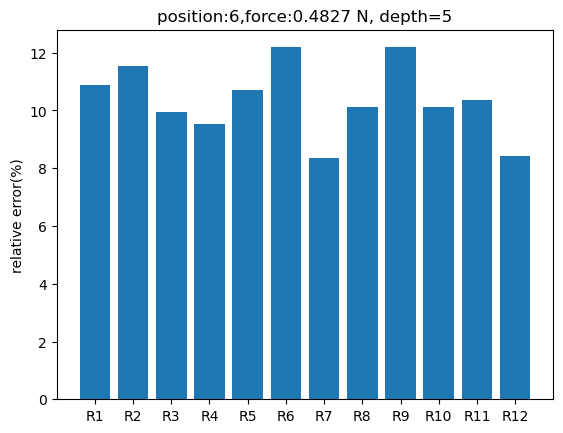

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


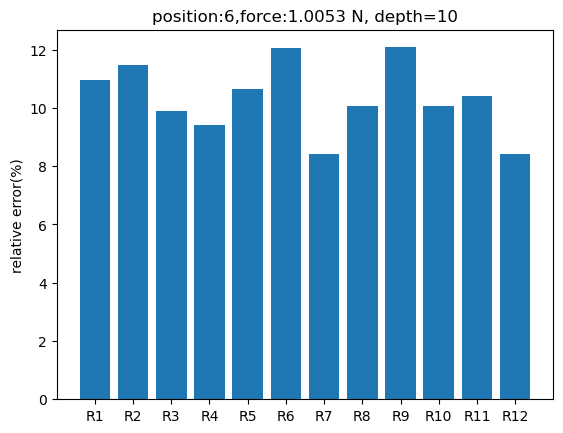

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


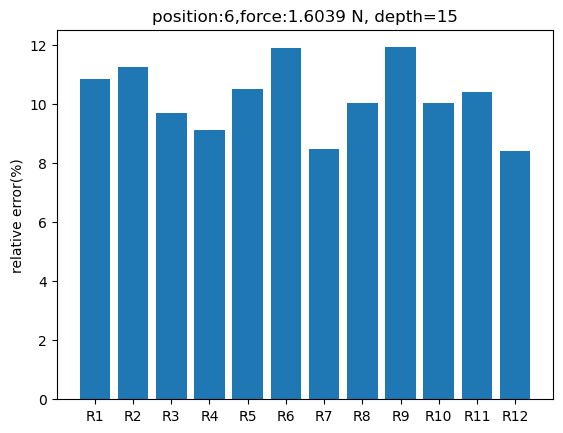

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


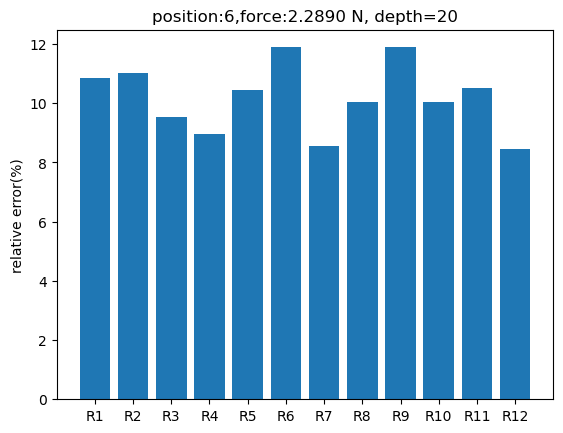

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


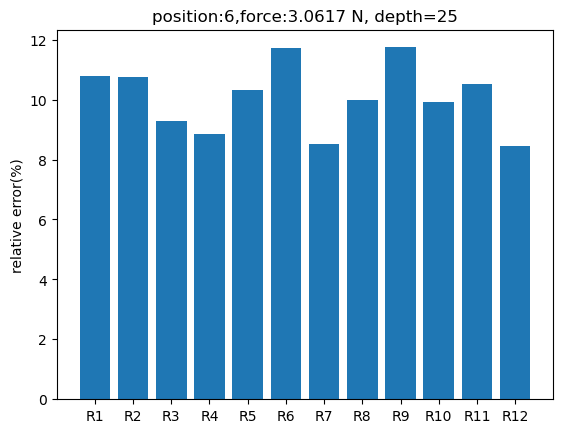

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


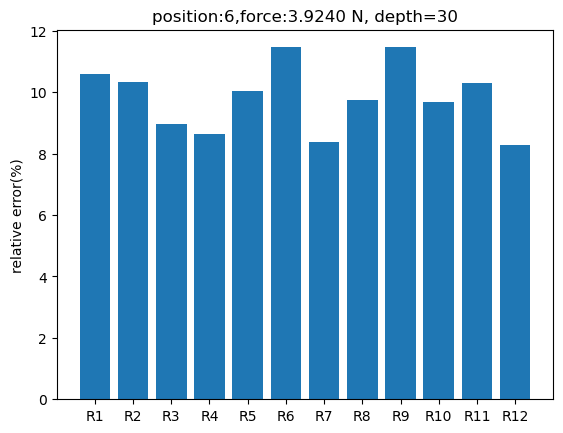

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


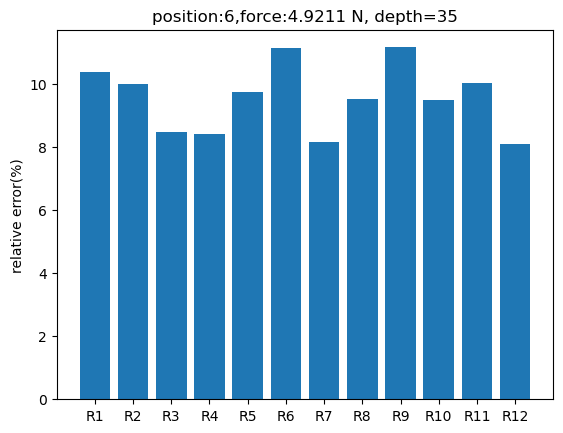

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


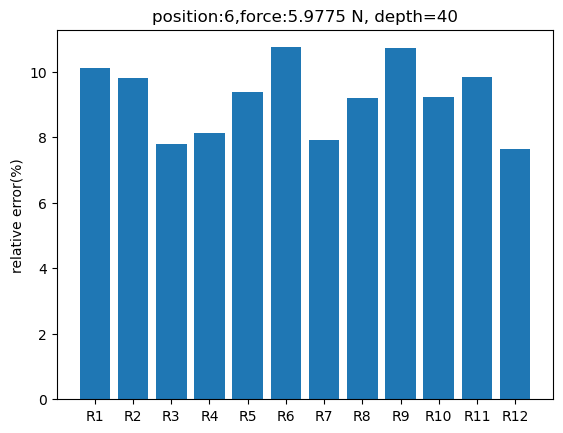

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


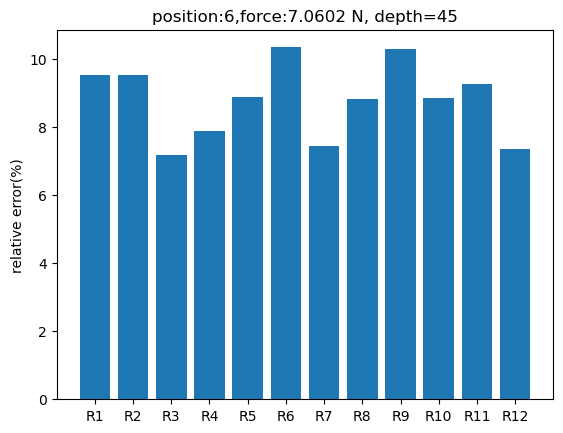

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


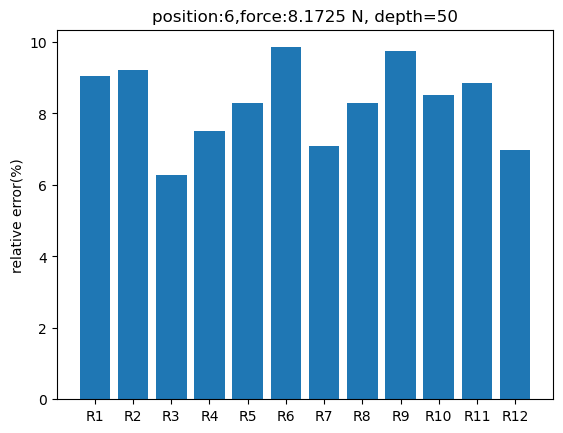

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


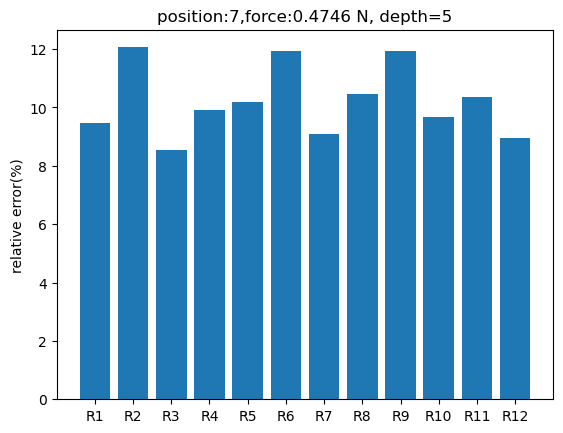

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


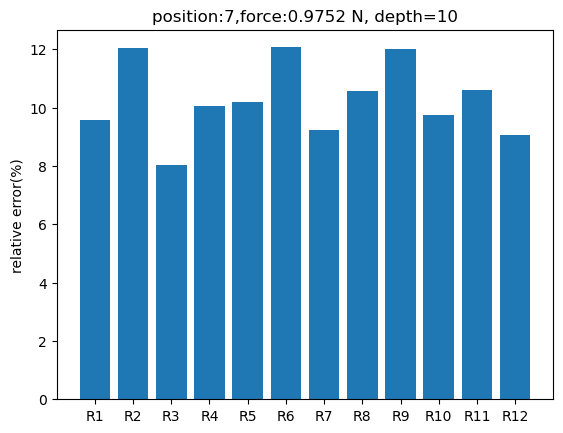

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


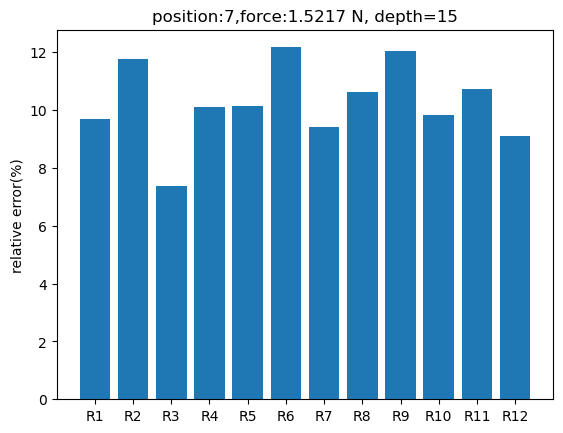

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


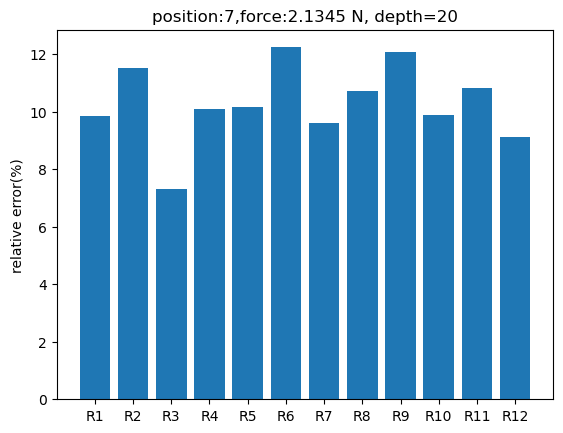

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


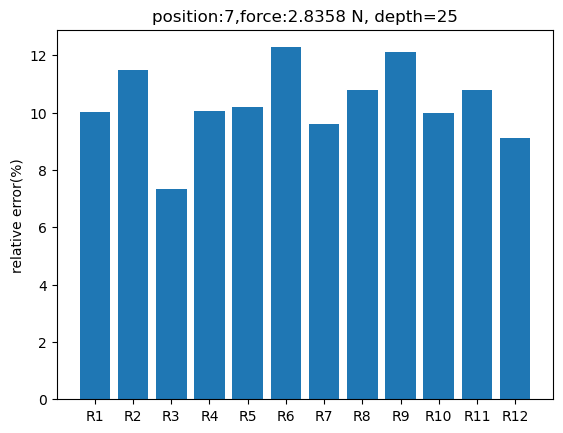

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


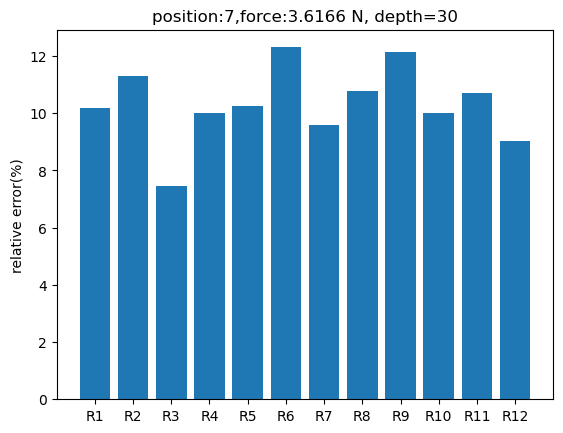

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


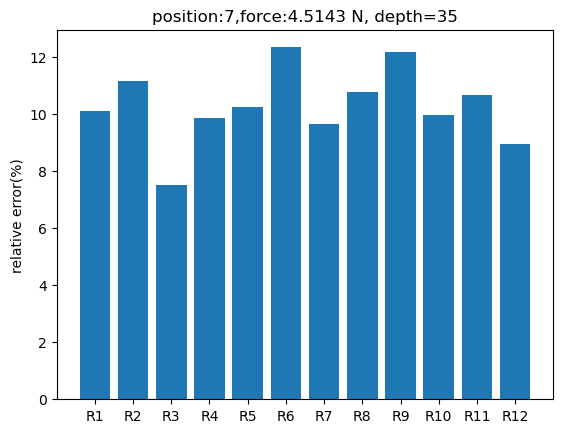

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


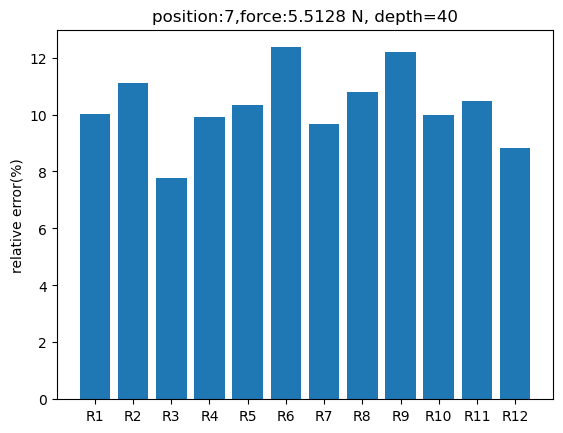

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


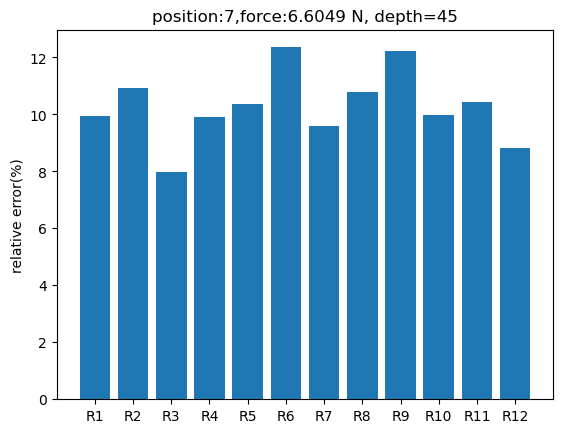

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


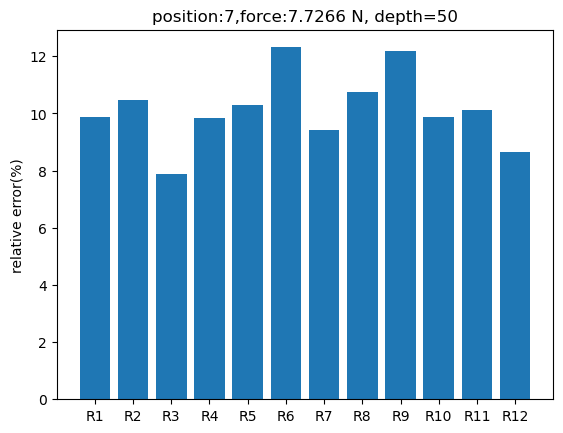

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


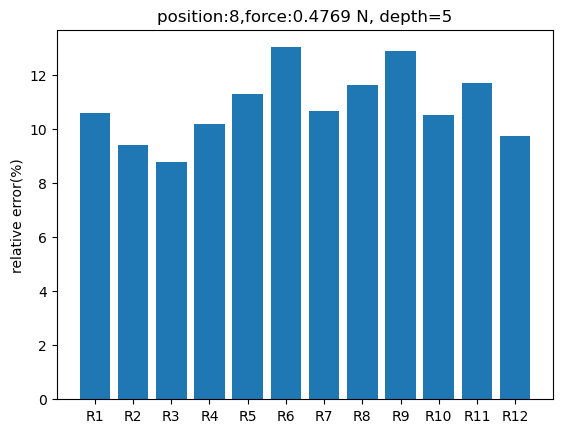

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


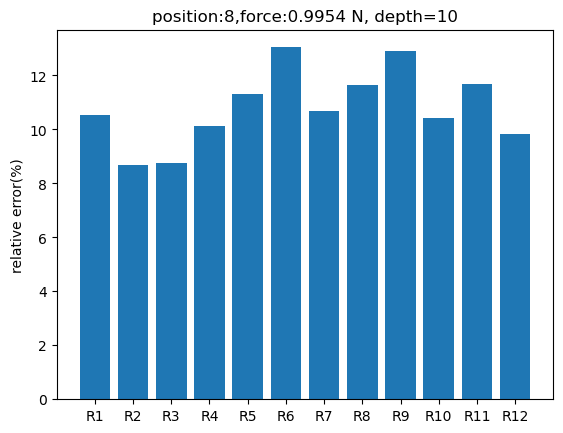

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


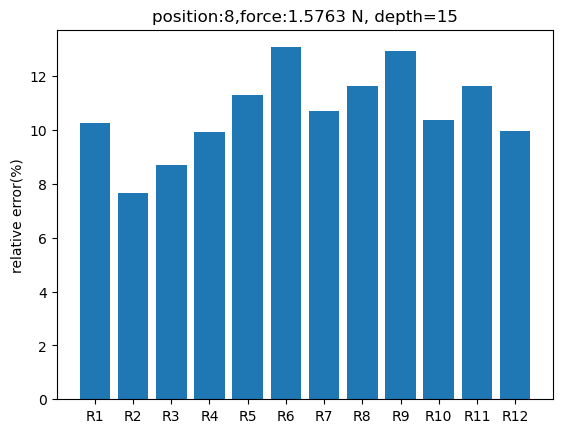

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


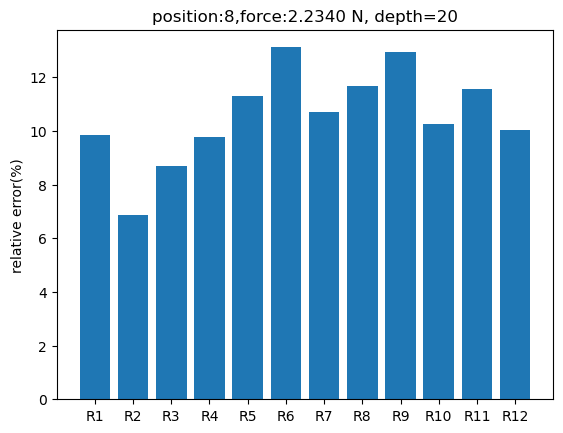

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


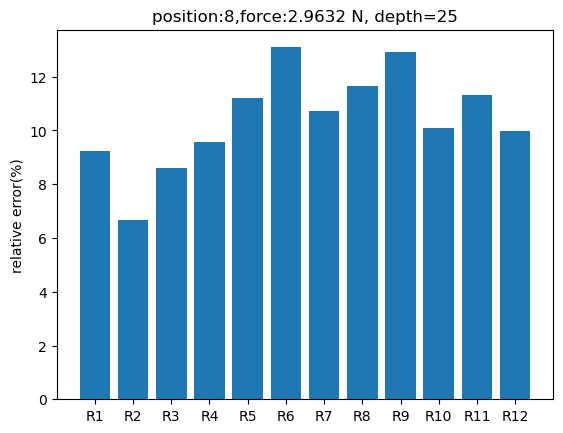

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


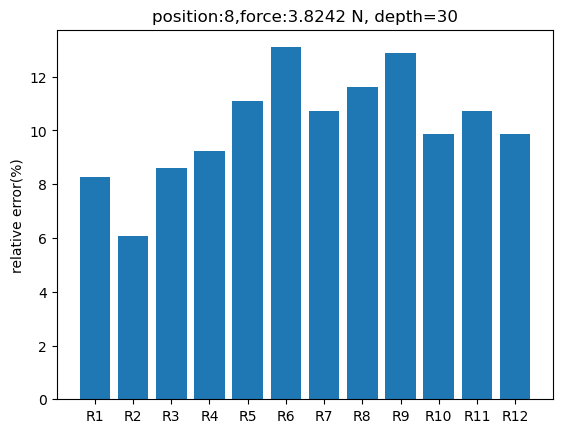

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


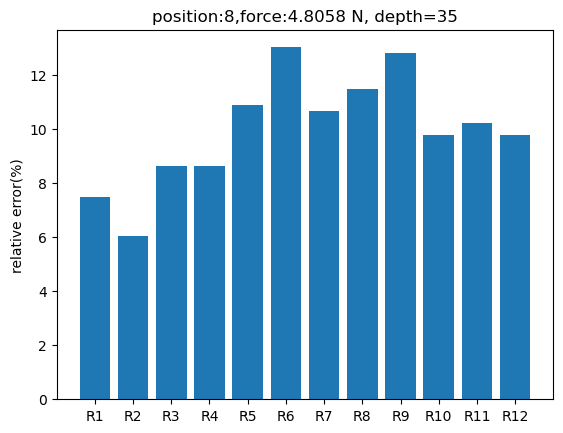

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


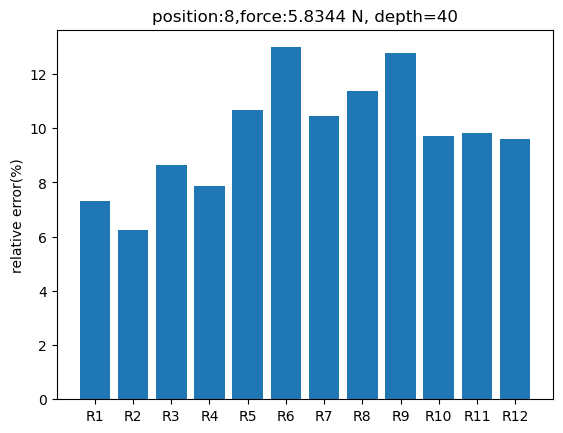

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


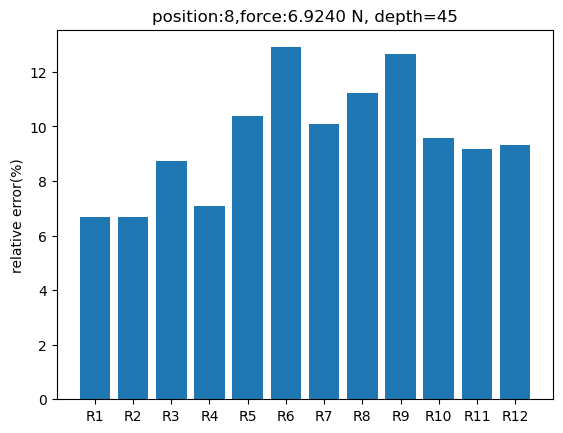

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


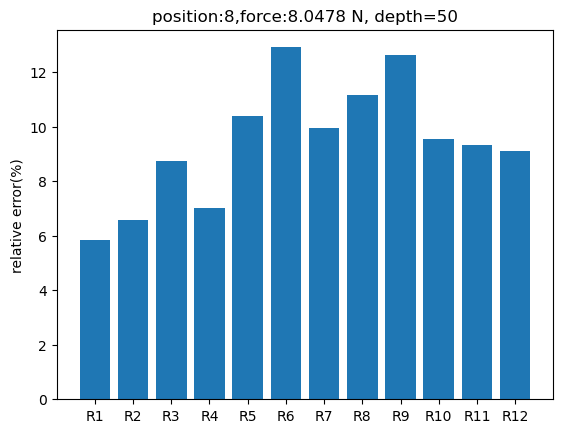

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


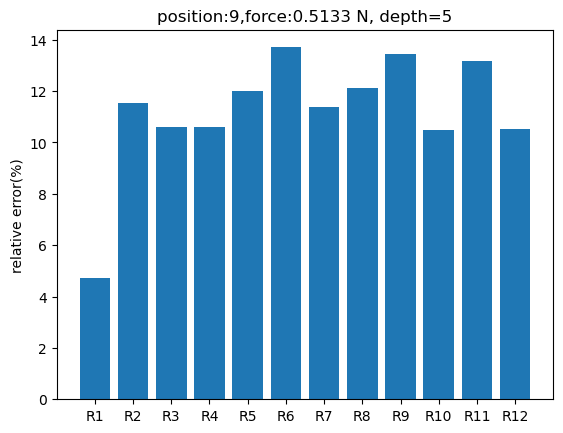

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


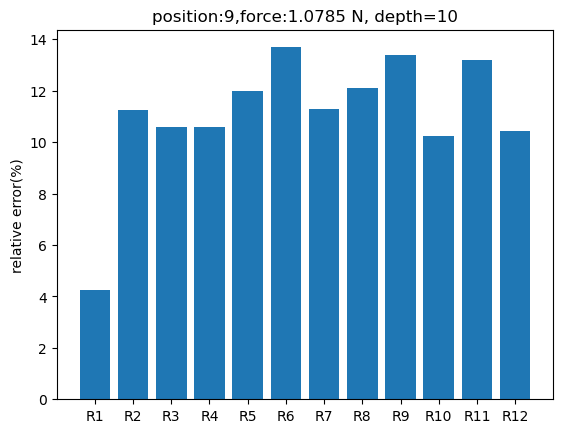

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


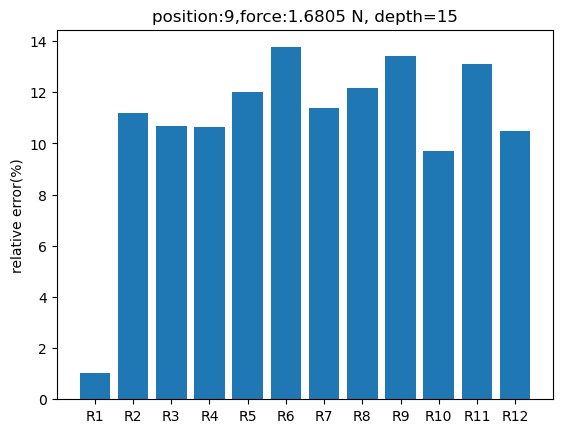

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


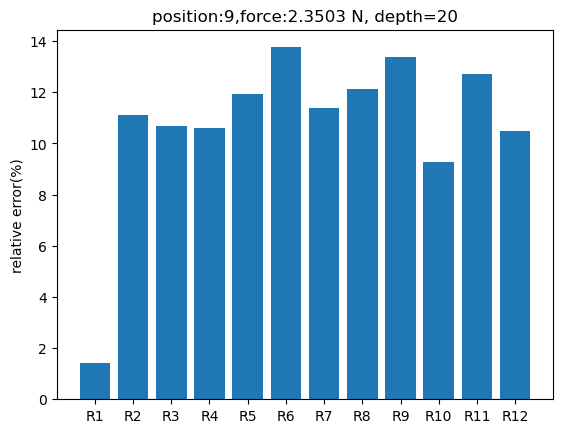

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


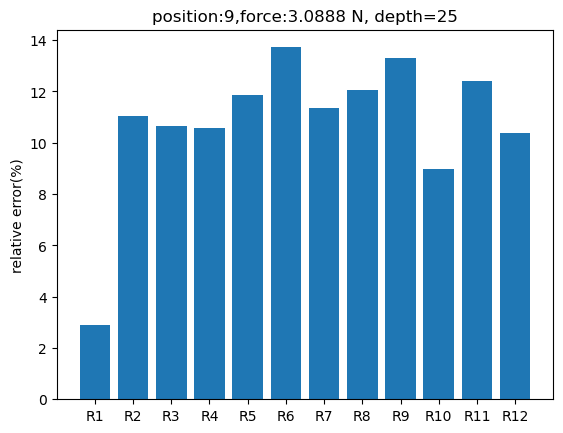

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


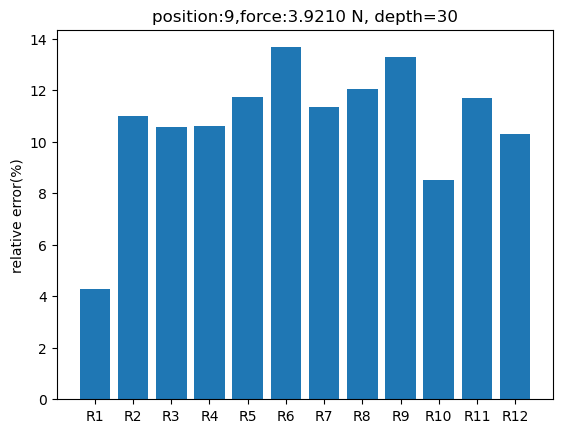

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


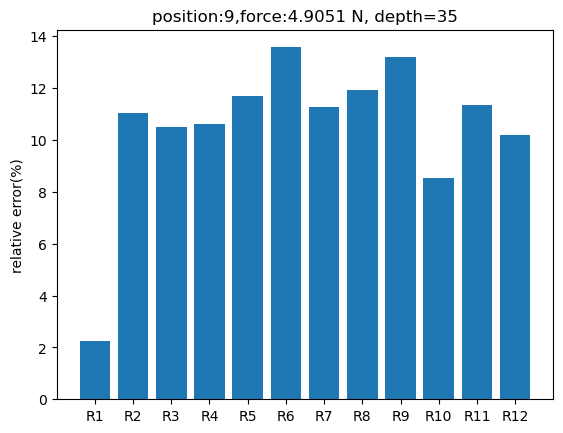

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


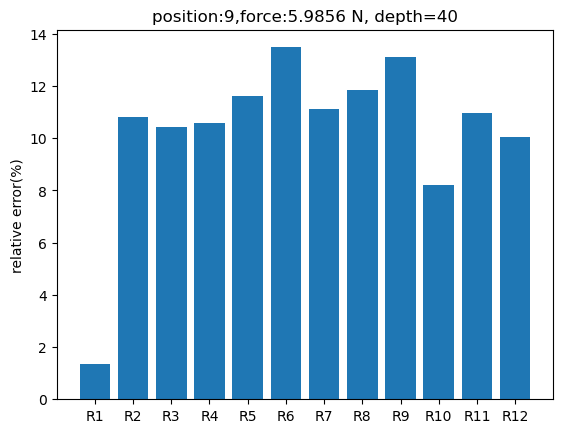

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


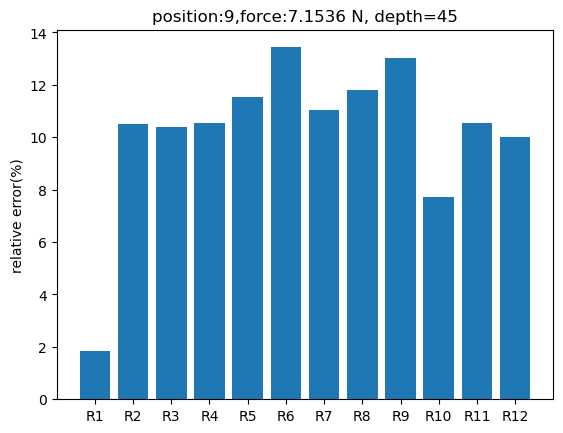

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


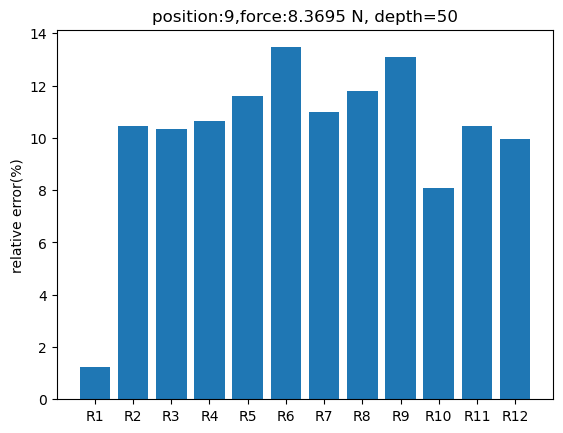

In [168]:
for i in range(len(df_loop2[['Force','depth','pos']])):
    res_pred=show_r(df_loop2[['Force','depth','pos']].iloc[i].values.reshape(1,-1),scaler_X,scaler_y,ann_model,rf_model,xgb_model,meta_model)
    plt.bar(df_loop2.columns[3:],100*np.abs(res_pred-df_loop2[df_loop2.columns[3:]].iloc[0].values)/df_loop2[df_loop2.columns[3:]].iloc[0].values)
    plt.ylabel('relative error(%)')
    plt.title('position:{},force:{:.4f} N, depth={}'.format(df_loop2['pos'].iloc[i],df_loop2['Force'].iloc[i],df_loop2['depth'].iloc[i]))
    plt.show()

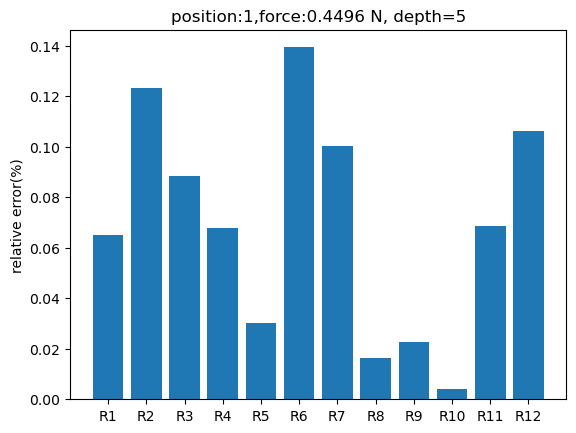

In [167]:
plt.bar(df_loop2.columns[3:],100*np.abs(res_pred-df_loop2[df_loop2.columns[3:]].iloc[0].values)/df_loop2[df_loop2.columns[3:]].iloc[0].values)
plt.ylabel('relative error(%)')
plt.title('position:{},force:{:.4f} N, depth={}'.format(df_loop2['pos'].iloc[0],df_loop2['Force'].iloc[0],df_loop2['depth'].iloc[0]))
plt.show()

In [153]:
100*np.abs(res_pred-df_loop2[df_loop2.columns[3:]].iloc[0].values)/df_loop2[df_loop2.columns[3:]].iloc[0].values

array([0.06511644, 0.1234297 , 0.08836332, 0.06782755, 0.03030871,
       0.13938582, 0.10013279, 0.01618771, 0.02251388, 0.00390907,
       0.06849963, 0.10608053])

# note

In [72]:
listfolders=os.listdir(folder)

In [73]:
folder_force=os.listdir('{}/{}'.format(folder,listfolders[0]))

In [74]:
listfolders[0]

'9 phr Force'

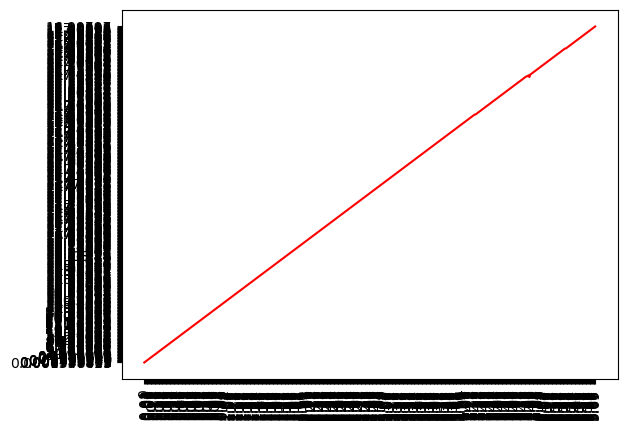

In [75]:
force_file=pd.read_csv('{}/{}/{}'.format(folder,listfolders[0],folder_force[-1]))
plt.plot(force_file.iloc[2:,0].values,force_file.iloc[2:,1].values,'r')
plt.xticks(rotation=90)
plt.show()

In [15]:
concent=listfolders[0][:5]

In [17]:
R1=[]
R2=[]
R3=[]
R4=[]
R5=[]
R6=[]
R7=[]
R8=[]
R9=[]
R10=[]
R11=[]
R12=[]
F=[]
pos=[]
withdepth=[]
list_P=['P{}'.format(i) for i in range(1,10)]
for f in listfolders:
    #print(f.split('_'))#,' depth: ',f.split('_')[1],' position: ',f.split('_')[1])
    for depth in range(5,51,5):
        for p in list_P:
            if '{}_{}__{}'.format(concent,depth,p) in f:
                #print(f)
                filename='{}/{}/dat00001.csv'.format(folder,f)
                #print(filename)
                getdat=pd.read_csv(filename)
                res=getdat.sum()
                R1.append(res.values[2])
                R2.append(res.values[3])
                R3.append(res.values[4])
                R4.append(res.values[5])
                R5.append(res.values[6])
                R6.append(res.values[7])
                R7.append(res.values[8])
                R8.append(res.values[9])
                R9.append(res.values[10])
                R10.append(res.values[11])
                R11.append(res.values[12])
                R12.append(res.values[13])
                F.append(get_force(folder,listfolders[0],concent,depth,int(p[1:])))
                withdepth.append(depth)
                pos.append(int(p[1:]))

In [18]:
df=pd.DataFrame({'depth':withdepth,'pos':pos,'Force':F,'R1':R1,'R2':R2,'R3':R3,'R4':R4,'R5':R5,'R6':R6,'R7':R7,'R8':R8,'R9':R9,'R10':R10,'R11':R11,'R12':R12})

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam

X = df[['Force', 'depth', 'pos']].values
y = df[[f'R{i}' for i in range(1, 13)]].values

# Normalize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# === 1. ANN Model ===
def build_ann(input_dim, output_dim):
    model = Sequential([
        Input(shape=(3,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(output_dim)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

ann_model = build_ann(X_scaled.shape[1], y_scaled.shape[1])
ann_model.fit(X_scaled, y_scaled, epochs=300, batch_size=4, verbose=0)

# === 2. Random Forest ===
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_scaled, y_scaled)

# === 3. XGBoost ===
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, objective='reg:squarederror')
xgb_model.fit(X_scaled, y_scaled)

# === Get predictions from all models ===
ann_pred = ann_model.predict(X_scaled)
rf_pred = rf_model.predict(X_scaled)
xgb_pred = xgb_model.predict(X_scaled)

# Stack all predictions
stacked_features = np.hstack([ann_pred, rf_pred, xgb_pred])

# === Train Meta Model ===
meta_model = Ridge()
meta_model.fit(stacked_features, y_scaled)

# Predict final output
final_pred_scaled = meta_model.predict(stacked_features)
final_pred = scaler_y.inverse_transform(final_pred_scaled)
y_true = scaler_y.inverse_transform(y_scaled)

# === R² Scores ===
r2_scores = r2_score(y_true, final_pred, multioutput='raw_values')
print("\n📈 R² Scores (Stacked Model on All Data):")
for i, r2 in enumerate(r2_scores, 1):
    print(f"R² Score for R{i}: {r2:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📈 R² Scores (Stacked Model on All Data):
R² Score for R1: 0.9967
R² Score for R2: 0.9967
R² Score for R3: 0.9950
R² Score for R4: 0.9948
R² Score for R5: 0.9950
R² Score for R6: 0.9961
R² Score for R7: 0.9964
R² Score for R8: 0.9966
R² Score for R9: 0.9950
R² Score for R10: 0.9964
R² Score for R11: 0.9960
R² Score for R12: 0.9957


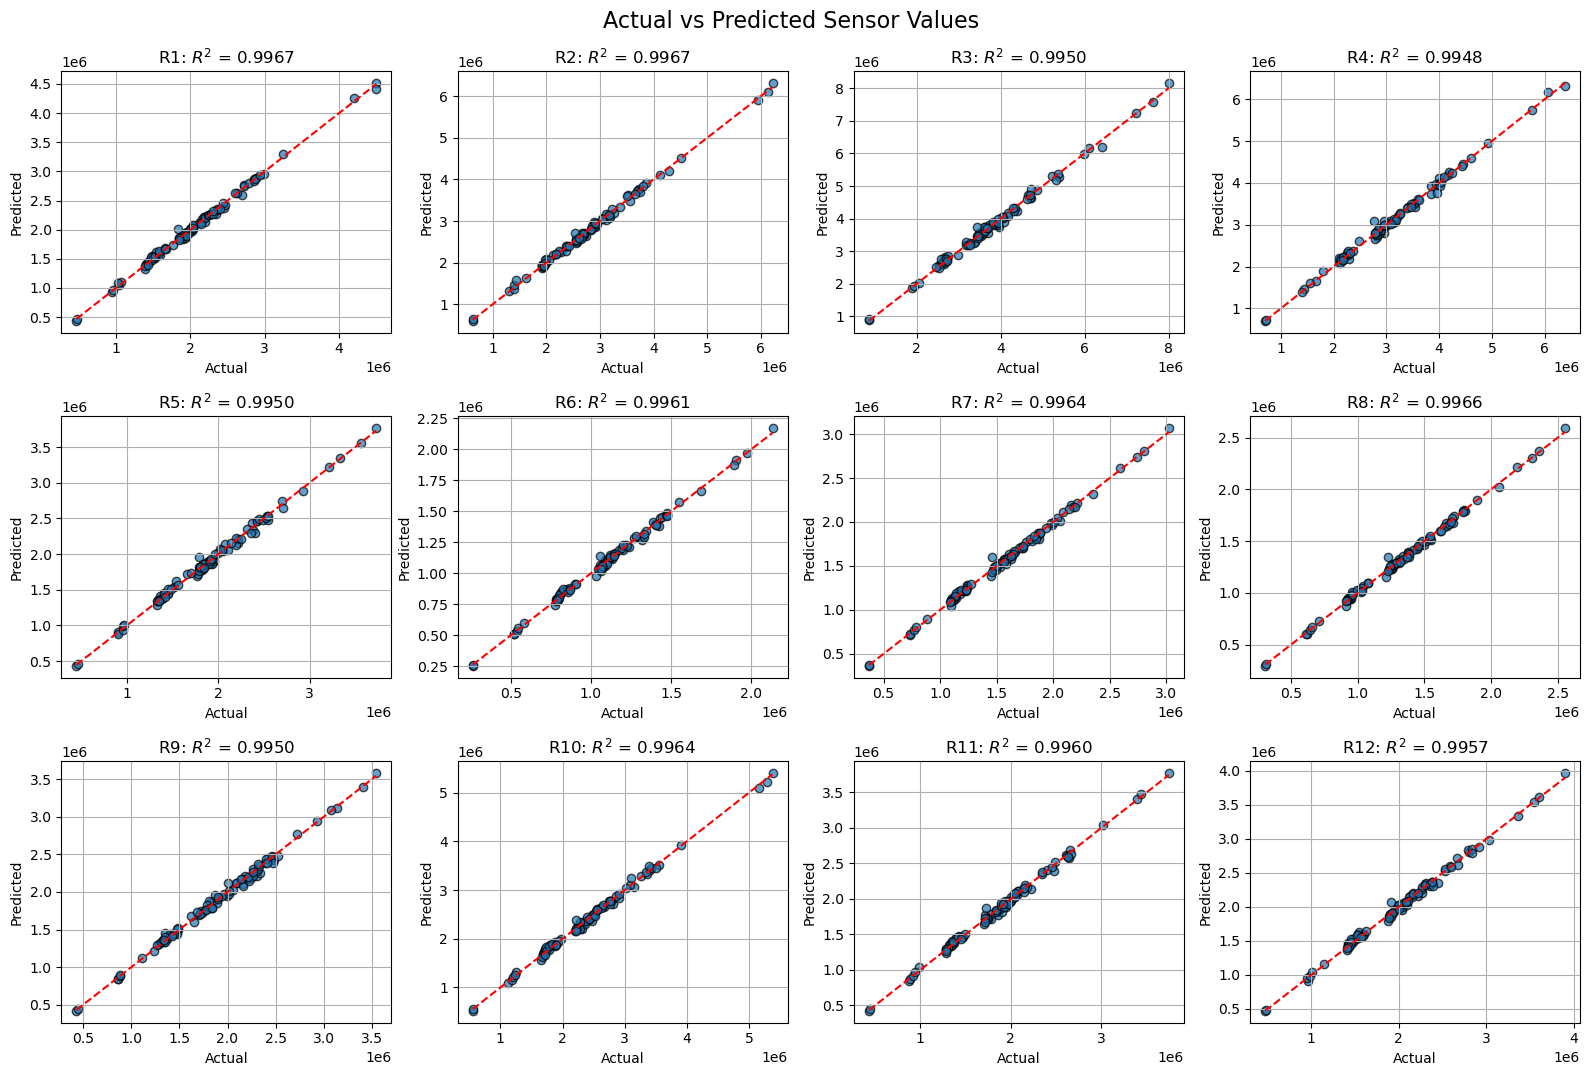

In [21]:
#comparing actual and predict results
n_cols = 4
n_rows = int(np.ceil(12 / n_cols))
plt.figure(figsize=(n_cols * 4, n_rows * 3.5))

for i in range(12):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(y_true[:, i], final_pred[:, i], alpha=0.7, edgecolors='k')
    plt.plot([y_true[:, i].min(), y_true[:, i].max()],
             [y_true[:, i].min(), y_true[:, i].max()], 'r--')
    plt.title(f'R{i+1}: $R^2$ = {r2_scores[i]:.4f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Actual vs Predicted Sensor Values ', fontsize=16, y=1.02)
plt.show()


In [22]:
def show_r(new_input):
    #new_input = np.array([[1.25, 10, 9]])  # [Force, depth, pos]

    new_input_scaled = scaler_X.transform(new_input)
    
    ann_pred_new = ann_model.predict(new_input_scaled)
    rf_pred_new = rf_model.predict(new_input_scaled)
    xgb_pred_new = xgb_model.predict(new_input_scaled)
    
    stacked_new = np.hstack([ann_pred_new, rf_pred_new, xgb_pred_new])
    
    final_pred_scaled = meta_model.predict(stacked_new)
    final_pred = scaler_y.inverse_transform(final_pred_scaled)
    
    for i, val in enumerate(final_pred[0], 1):
        print(f"Predicted R{i}: {val:.2f}")


In [23]:
show_r(np.array([[1.25, 10, 9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted R1: 1883663.22
Predicted R2: 2799250.63
Predicted R3: 3932784.87
Predicted R4: 3036112.37
Predicted R5: 1788591.64
Predicted R6: 972735.39
Predicted R7: 1310192.75
Predicted R8: 1107621.65
Predicted R9: 1498361.94
Predicted R10: 2245502.85
Predicted R11: 1575586.77
Predicted R12: 1684353.75
